In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('data/train.csv')
train.shape

(10886, 12)

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train.datetime = pd.to_datetime(train.datetime)

In [17]:
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['day'] = train.datetime.dt.day
train['hour'] = train.datetime.dt.hour
train['min'] = train.datetime.dt.minute
train['sec'] = train.datetime.dt.second

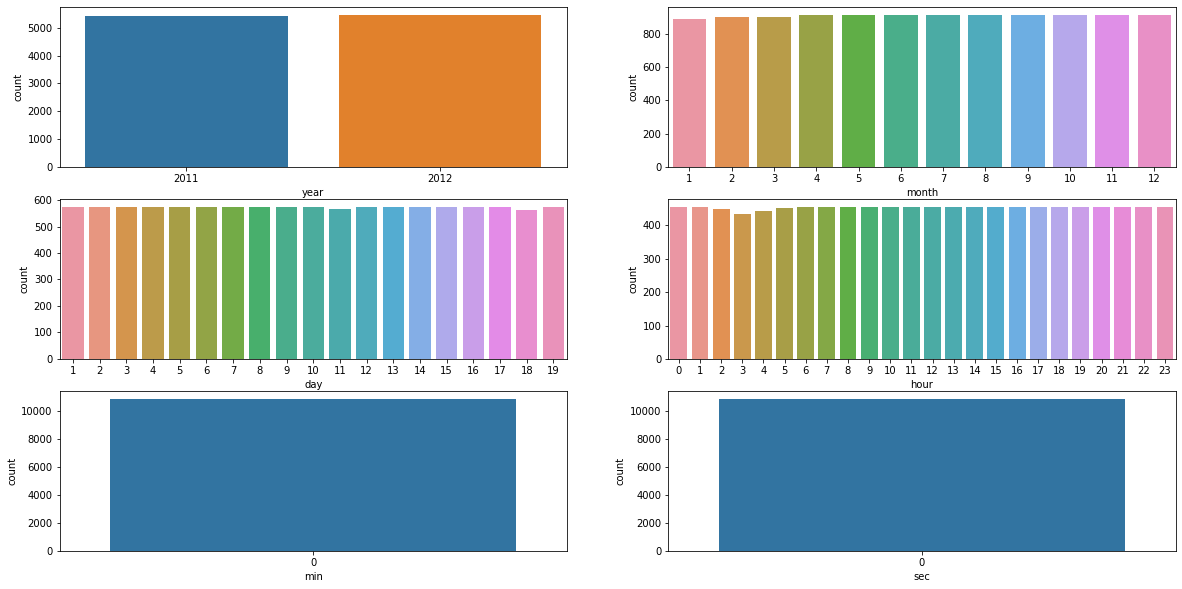

In [19]:
li = ['year','month','day','hour','min','sec']
plt.figure(figsize = (20, 10))
for i in range(6):
    plt.subplot(3,2,i+1)
    sns.countplot(train[li[i]])

In [22]:
data = train[train.columns.difference(['datetime'])]

In [26]:
X = data[data.columns.difference(['count'])]
y = data['count']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('mse :', mse)
print('rmse :', rmse)

mse : 3.563589631874395e-27
rmse : 5.969580916508625e-14


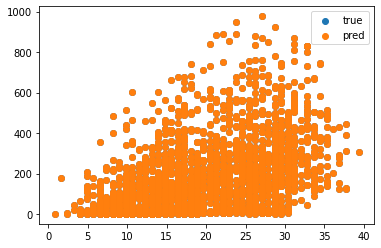

In [32]:
plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], pred, label="pred")
plt.legend()
plt.show()

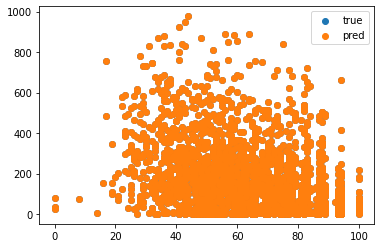

In [33]:
plt.scatter(X_test['humidity'], y_test, label="true")
plt.scatter(X_test['humidity'], pred, label="pred")
plt.legend()
plt.show()